# Laboratorio 3 - BI

Se plantea resolver el problema siguiendo los siguientes pasos a lo largo de este Notebook:

* Entendimiento de los datos y Preparación de datos.
* Identificación de variables a utilizar
* Modelamiento.
* Evaluación cuantitativa
* Evaluación cualitativa
* Exportar el modelo


En el perfilamiento de datos, se desea saber cuántos datos se tienen por filas y columnas, los tipos de datos, la integridad de los datos, su distribución, etc.

En orden de este proceso, inicialmente se procede a importar las librerías a usar durante al análisis y posteriormente el perfilamiento de los datos.

Se escoge un modelo de regresión lineal, ya que en los datos se nos ofrece una variable Objetivo "life expectancy". numérica, la cuál se desea predecir, por lo tanto, un modelo como el nombrado anteriormente es ideal para esta propuesta.

## Entendimiento del negocio

La Clínica de los Alpes desea conocer cuales son los principales factores de muerte que disminuyen la expectativa de vida de los ciudadanos de su país para realizar campañas de concientización con el fin de mejorar la calidad de vida de los ciudadanos.
La Clínica cuenta con un conjunto de datos sobre las expectativas de vida a lo largo de los años en los Alpes y países cercanos, junto con algunos indicadores que miden la salud de una persona, como lo puede ser el índice de masa corporal, la incidencia de varias enfermedades y algunos factores socioculturales como el consumo de alcohol o tabaco.


### 0. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [ ]:
# Librería para comando de sistema
import os
# Librerías para manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Librerías de aprendizaje automático.
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# 1. Entendimiento de los datos y preparación de los datos

Se nos entregó un archivo con varias columnas numéricas, rangos muy distintos y una columna sin nombre, a partir de estos datos se nos solicitó predecir la expectativa de vida (Life expectancy) y a continuación se mostrará el análisis de calidad de los datos: 

### Carga de los datos
A través de la librería **pandas** podemos realizar la carga de datos desde diferentes fuentes de información, en este caso se realizará la carga de un archivo plano csv (archivo separado por comas).

In [ ]:
# Se cargan los datos. 
data=pd.read_csv('202210_Laboratorio3_data_DatosTrain.csv', sep=',', encoding = 'utf-8')

In [ ]:
# Cantidad de datos y número de variables
data.shape

(2644, 20)

In [ ]:
#Muestra las casillas con nulos de cada columna
data.isnull().sum()

Unnamed: 0                         0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  10-19 years              0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
# Eliminación de los datos que no se consideran útiles para el análisis de los datos
data = data.drop(['Unnamed: 0'], axis=1)
data.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2644.000000,2644.000000,2644.00000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2.644000e+03,2644.000000,2644.000000,2644.000000,2644.000000
mean,69.068797,162.465204,31.14410,4.328684,792.465552,65.532905,2432.922844,37.662746,43.160363,81.967095,5.431078,81.926626,1.617095,6726.080237,1.052152e+07,4.743911,4.778215,0.602879,11.482678
std,10.351757,121.186953,123.93232,4.146851,2077.768681,39.221347,11868.652439,20.339750,168.485929,24.521529,2.821982,24.502772,4.822150,13873.881462,5.680977e+07,4.467839,4.553418,0.244040,4.170684
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,62.975000,73.000000,0.00000,0.407500,7.044565,14.750000,0.000000,18.900000,0.000000,78.000000,3.677500,78.000000,0.100000,238.626882,1.285900e+04,1.500000,1.500000,0.473000,9.500000
50%,72.100000,143.000000,2.00000,3.225000,70.648787,87.000000,14.000000,43.000000,3.000000,93.000000,5.550000,93.000000,0.100000,1254.652810,6.227965e+05,3.200000,3.200000,0.668000,12.300000
75%,75.800000,226.250000,18.00000,7.495000,485.959559,96.000000,329.750000,55.900000,23.000000,97.000000,7.372500,97.000000,0.800000,5277.746332,5.194999e+06,7.200000,7.300000,0.781000,14.200000
max,89.000000,699.000000,1800.00000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
# Se eliminan las filas con nulos y los duplicados
data = data.dropna()
data = data.drop_duplicates()

In [ ]:
#Verificamos el tipo de cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2644 entries, 0 to 2643
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2644 non-null   float64
 1   Adult Mortality                  2644 non-null   float64
 2   infant deaths                    2644 non-null   int64  
 3   Alcohol                          2644 non-null   float64
 4   percentage expenditure           2644 non-null   float64
 5   Hepatitis B                      2644 non-null   float64
 6   Measles                          2644 non-null   int64  
 7   BMI                              2644 non-null   float64
 8   under-five deaths                2644 non-null   int64  
 9   Polio                            2644 non-null   float64
 10  Total expenditure                2644 non-null   float64
 11  Diphtheria                       2644 non-null   float64
 12  HIV/AIDS            

In [ ]:
#Aquí se revisó cada una de las variables para encontrar valores extraños y quitarlos más adelante
data['Population'].value_counts()

0.0         540
444.0         4
127445.0      2
1141.0        2
292.0         2
           ... 
814218.0      1
815691.0      1
816628.0      1
818354.0      1
11689.0       1
Name: Population, Length: 2098, dtype: int64

In [ ]:
#Measles fue de las columnas más sospechosas ya que su media da por arriba de 2000 cuando no puede pasar de 1000 habitantes
data['Measles'].value_counts()

0       899
1        98
2        66
3        41
4        30
       ... 
1356      1
6847      1
216       1
2464      1
3578      1
Name: Measles, Length: 859, dtype: int64

In [ ]:
#Ahora basándonos en datos lógicos pondremos los límites para diferentes variables tales como:
#No pueden morir 0 adultos y no pueden morir más de 1000 de solo 1000
data = data[data['Adult Mortality'].between(1,1000)]
#No pueden morir más de 1000 de solo 1000
data = data[data['infant deaths'].between(0,1000)]
#La variable Measles posee muchos valores por arriba de mil así que es preferible quitar esta columna
#data = data[data['Measles'].between(0,1000)]
data = data.drop(['Measles'], axis=1)
#No existen personas con un BMI inferior a 5 ni superior a 70
data = data[data['BMI'].between(5,70)]
#No pueden morir más de 1000 niños en un máximo de 1000 personas
data = data[data['under-five deaths'].between(0,1000)]
#No es posible un GDP de 0
data = data[data['GDP'].between(1,2000000)]
#No es posible un país con población de 0
data = data[data['Population'].between(1,2000000000000)]

In [ ]:
data.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1.923000e+03,1923.000000,1923.000000,1923.000000,1923.000000
mean,69.400208,163.950078,24.278731,4.686339,953.996248,62.632865,38.555642,34.349974,81.763391,5.726495,81.947478,1.862975,7412.095247,1.016077e+07,4.697712,4.719761,0.634617,12.077743
std,9.900469,124.340377,66.721877,4.210213,2336.255701,39.893516,18.588739,97.012249,24.158677,2.737880,24.147824,5.407871,14476.641944,2.710642e+07,4.441248,4.456996,0.208517,3.444849
min,36.300000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,62.800000,70.000000,0.000000,0.510000,23.955342,8.000000,19.800000,1.000000,77.000000,4.165000,79.000000,0.100000,444.584160,2.161730e+05,1.400000,1.400000,0.491000,9.900000
50%,72.100000,142.000000,3.000000,4.090000,109.705184,84.000000,43.900000,3.000000,92.000000,5.840000,92.000000,0.100000,1721.973863,1.413264e+06,2.600000,2.700000,0.680000,12.400000
75%,76.250000,229.000000,19.000000,7.720000,580.942698,95.000000,55.800000,24.000000,97.000000,7.735000,97.000000,1.000000,5705.224348,7.417429e+06,7.400000,7.400000,0.792000,14.700000
max,89.000000,699.000000,576.000000,17.870000,19479.911610,99.000000,69.700000,943.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,2.581621e+08,22.200000,22.600000,0.948000,20.700000


In [ ]:
#Después de esto verificamos que todos los valores fueran numéricos
for i in data.columns:    
    data = data[pd.to_numeric(data[i], errors='coerce').notnull()]

In [ ]:
#Todas las columnas se vuelven numéricas
for col in data.columns:
    data[col] = data[col].astype('float64')
#Verificamos el tipo de cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1923 entries, 0 to 2643
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  1923 non-null   float64
 1   Adult Mortality                  1923 non-null   float64
 2   infant deaths                    1923 non-null   float64
 3   Alcohol                          1923 non-null   float64
 4   percentage expenditure           1923 non-null   float64
 5   Hepatitis B                      1923 non-null   float64
 6   BMI                              1923 non-null   float64
 7   under-five deaths                1923 non-null   float64
 8   Polio                            1923 non-null   float64
 9   Total expenditure                1923 non-null   float64
 10  Diphtheria                       1923 non-null   float64
 11  HIV/AIDS                         1923 non-null   float64
 12  GDP                 

In [ ]:
data.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62.0,0.01,71.279624,65.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64.0,0.01,73.523582,62.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66.0,0.01,73.219243,64.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69.0,0.01,78.184215,67.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71.0,0.01,7.097109,68.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# 2. Identificación de variables a utilizar
### Exploración y descripción de los datos
Ya con los datos preparados identificamos la variable objetivo "Life expectancy" y al correr un primer intento de modelo quitamos las variables que no representan de forma lineal a la variable (Esto se hace al final de esta sección)

In [ ]:
#Se cuentan los valores de la variable target
data["Life expectancy"].value_counts()

73.0    36
75.0    22
81.0    21
78.0    19
73.9    19
        ..
43.1     1
57.8     1
46.3     1
49.9     1
44.6     1
Name: Life expectancy, Length: 350, dtype: int64

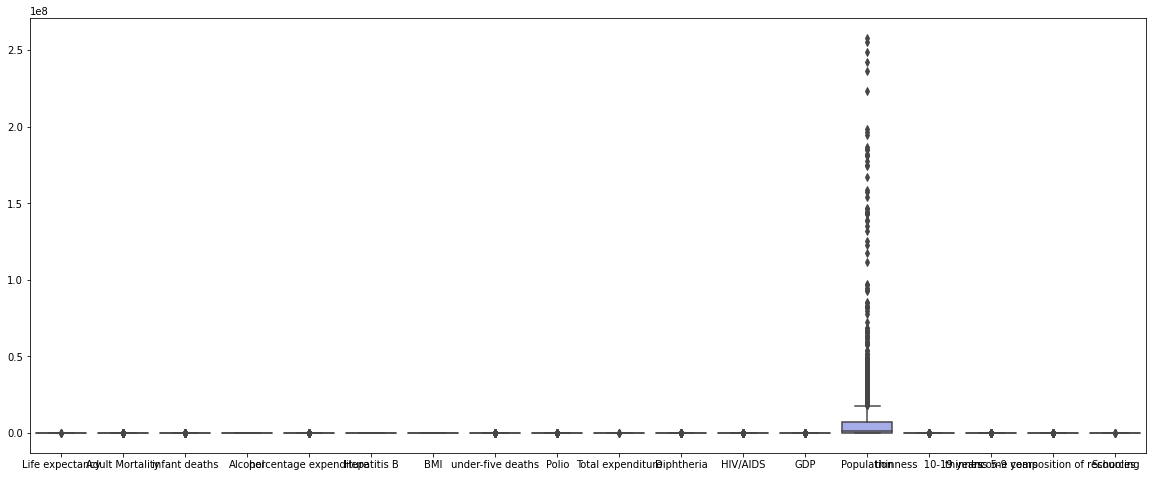

In [ ]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=data, orient="v")

In [ ]:
#Se decidió no realizar este paso ya que deja una interpretación perfecta por parte del modelo de regresión lineal por lo que es sospechoso y se prefiere quitar
#Normalizamos los datos ya que estos tienen rangos y escalas muy distintas, así podemos mejorar el modelo
#d = preprocessing.normalize(data)
#data_norm = pd.DataFrame(d, columns=data.columns)
#data=data_norm

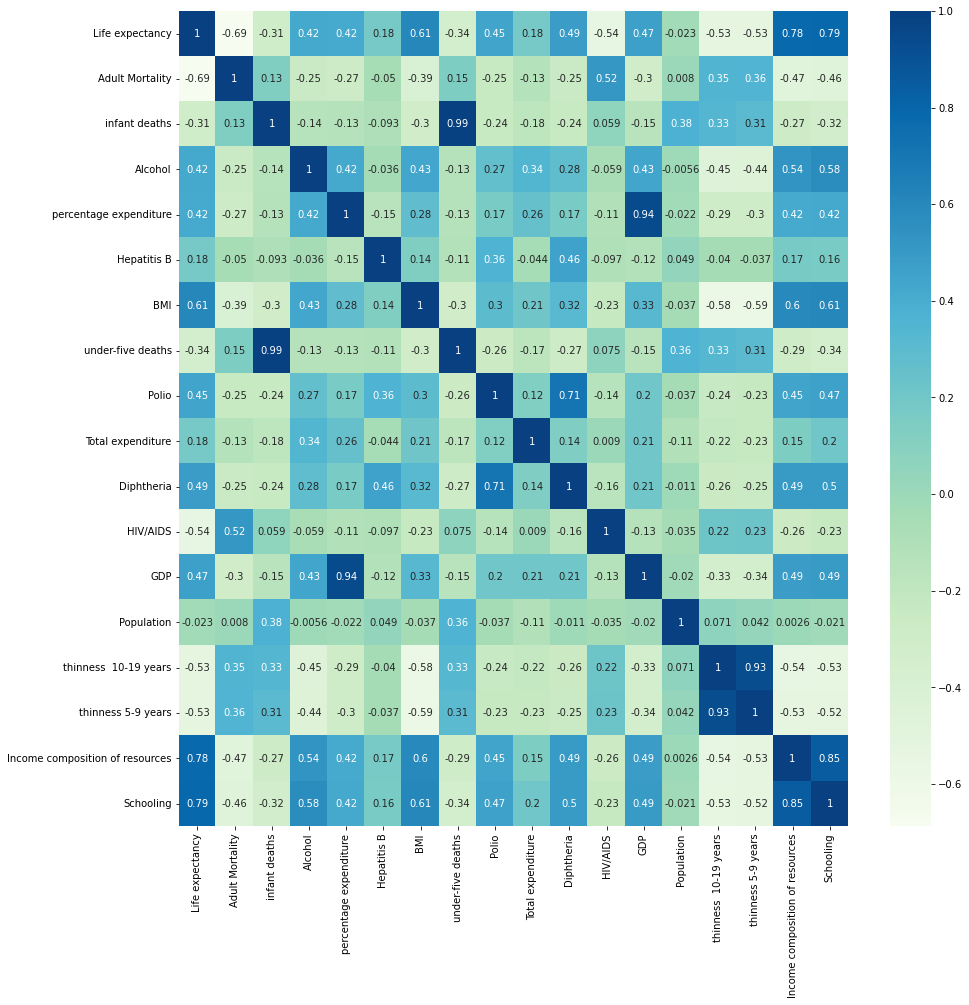

In [ ]:
# ¿Hay correlación entre variables?
plt.figure(figsize =(15,15))
correlacion = data.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

## Este paso no se decide hacer ya que baja el R2 del modelo
Después de realizar un primero modelo se obtuvo que las siguientes variables no son importantes para el modelo de regresión ya que el P-value>Significancia (5%):
- infant deaths	P-value:0.937
- percentage expenditure	P-value:0.166
- under-five deaths	P-value:0.237	
- Population	P-value:0.473

In [ ]:
# Esas variables se retiran del modelo:
#data = data.drop(['infant deaths','percentage expenditure','under-five deaths','Population'], axis=1)

# 3. Construcción del modelo
Después de limpiar y discriminar los datos, se procede a crear la regresión Lineal con la variable objetivo ya planteada

In [ ]:
# Se selecciona la variable objetivo, en este caso "Life expectancy".
Y = data['Life expectancy']
# Del conjunto de datos se elimina la variable "PermaneceEnEmpresa"
X = data.drop(['Life expectancy'], axis=1)

In [ ]:
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

In [ ]:
# Primero se crea el objeto para construir el modelo
modelo_regresion = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train,Y_train)

LinearRegression()

# 4. Evaluación del modelo (cuantitativa y cualitativa)
Las métricas de evaluación nos van a permitir determinar qué tan bien se desempeña un modelo; es decir, cómo se ajusta a los datos. En esta sección se utilizan las siguientes métricas

1. Mean-Squared-Error(MSE). Error medio cuadrático
2. Mean-Absolute-Error(MAE). Error absoluto medio
3. R² or Coeficiente de determinación.

In [ ]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred_train = modelo_regresion.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_train, y_pred_train, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_train, y_pred_train))
print('R²: %.2f' % r2_score(Y_train, y_pred_train))

MSE: 3.84
MAE: 2.85
R²: 0.85


In [ ]:
# Se obtienen las predicciones del modelo sobre el conjunto test.
y_pred_test = modelo_regresion.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred_test, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred_test))
print('R²: %.2f' % r2_score(Y_test, y_pred_test))

MSE: 4.09
MAE: 3.08
R²: 0.84


In [ ]:
# Ajustar el modelo con los datos de entrenamiento
modelo_regresion.fit(X,Y)

LinearRegression()

In [ ]:
#Averiguamos la importancia de las variables dentro del modelo
importancia = modelo_regresion.coef_
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Income composition of resources,10.557665
1,Schooling,0.883936
2,Total expenditure,0.095712
3,BMI,0.048096
4,Diphtheria,0.025803
5,Polio,0.013417
6,Hepatitis B,0.001894
7,GDP,0.000051
8,Adult Mortality,-0.018563
9,thinness 10-19 years,-0.034888


### 5. Interpretación del modelo
Otro aspecto que debemos tener en cuenta es la significancia estadística de los coeficientes. Para determinarla, se aplica la prueba t de Student o t-test, con las siguientes hipótesis sobre los coeficientes:

H0: wi = 0, es decir, no hay una relación lineal entre la variable dependiente y la independiente.

Ha: wi ≠ 0, es decir, sí existe una relación lineal entre ambas variables.

El p-valor (en inglés p-value) del coeficiente verifica entonces la hipótesis nula de la siguiente forma:
Si el p-valor es menor o igual que el nivel de significancia seleccionado, entonces se puede afirmar que los datos suministran suficiente evidencia para rechazar la hipótesis nula. Es decir, cambios en la variable independiente estarán asociados con cambios en la variable dependiente y esta relación es estadísticamente significativa, por lo que la variable independiente será importante para el modelo de regresión.
Si el p-valor es mayor que el nivel de significancia, entonces no hay suficiente evidencia en los datos para rechazar la hipótesis nula y concluir que w1 es significativamente diferente de 0.

Por otra parte, el valor de un coeficiente determina cuánto aumenta o se reduce el valor promedio de la variable dependiente cuando la independiente cambia por una unidad. El signo del coeficiente indica si la relación es positiva o negativa.


Podemos sacar un reporte que nos va a permitir analizar estadísticos del modelo.

In [ ]:
# Ajustar el modelo para ver el reporte
model = sm.OLS(Y, X).fit()
# Mostrar las estadísticas del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.026e+04
Date:                Sat, 30 Apr 2022   Prob (F-statistic):                        0.00
Time:                        16:46:52   Log-Likelihood:                         -6805.2
No. Observations:                1923   AIC:                                  1.364e+04
Df Residuals:                    1910   BIC:                                  1.371e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Adult Mortality                     0.0166      0.002      9.239      0.000       0.013       0.020
Alcohol                            -0.5200      0.060     -8.671      0.000      -0.638      -0.402
Hepatitis B                        -0.0144      0.006     -2.553      0.011      -0.025      -0.003
BMI                                 0.1678      0.014     11.964      0.000       0.140       0.195
Polio                               0.0813      0.011      7.163      0.000       0.059       0.104
Total expenditure                   1.0131      0.072     14.076      0.000       0.872       1.154
Diphtheria                          0.0721      0.012      5.832      0.000       0.048       0.096
HIV/AIDS                           -0.5827      0.042    -14.001      0.000      -0.664      -0.501
GDP                             -3.253e-05   1.59e-05     -2.040      0.042   -6.38e-05   -1.25e-06
thinness  10-19 years               0.7123      0.118      6.014      0.000       0.480       0.945
thinness 5-9 years                  0.3326      0.119      2.798      0.005       0.099       0.566
Income composition of resources    22.0922      1.857     11.900      0.000      18.451      25.733
Schooling                           2.1969      0.112     19.693      0.000       1.978       2.416
==============================================================================
Omnibus:                      306.503   Durbin-Watson:                   0.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              936.788
Skew:                           0.810   Prob(JB):                    3.79e-204
Kurtosis:                       6.011   Cond. No.                     1.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusiones
Luego de ejecutar el modelo, se pueden realizar diferentes pruebas de hipotesis sobre el mismo. Para este caso, se decidieron ejecutar pruebas T para analizar cada una de las variables de manera independiente con respecto a nuestra variable objetivo. Teniendo el p-Value de cada una de las variables y el resultado de nuestra prueba T, podemos definir que las variables que tienen más influencia en la expectativa de vida de una persona son el consumo de Alcohol el indice de BMI, Polio,Diphtheria y HIV/AIDS.

# 6. Almacenamiento  del modelo.
Puedes guardar tu modelo para que lo puedas recuperar cuando lo desees o llevarlo a producción.

In [ ]:
# Una forma de guardar el modelo es a través de la funcionalidad joblib.
import joblib
# Ahora guardamos el modelo con el nombre que selecciones.
joblib.dump(modelo_regresion, 'ModeloRegresionLab3.joblib')
# Si lo quieres recuperar más tarde puedes utilizar la siguiente instrucción:
# modelo = load('ModeloRegresion.joblib') 

['ModeloRegresionLab3.joblib']